In [36]:
import random
from random import randint

In [37]:
score={'MU':1683,'PSG':1368,'LIV':1836,'TOT':1041, 'LYON':812, 'BARCA':1828, 'AJAX':832,'BM':1968,'JUV':1320,'RM':2625,'PORTO':1137, 'MC':2009, 'INTER':1202, 'DOR':1070,'SEV':1461,'CHE':1880,'AMD':1543,'BEN':1164,'ROM':1101,'ARS':1118,'Milan AC':995,'NAP':970,'Leipzig':889,'OM':611,'SOC':588,'WHU':557,'MON':533,'Basel':518,'ROT':494,'VAL':425,'LEI':410,'REN':393}

In [38]:
equipes=list(score.keys())
print(equipes)

['MU', 'PSG', 'LIV', 'TOT', 'LYON', 'BARCA', 'AJAX', 'BM', 'JUV', 'RM', 'PORTO', 'MC', 'INTER', 'DOR', 'SEV', 'CHE', 'AMD', 'BEN', 'ROM', 'ARS', 'Milan AC', 'NAP', 'Leipzig', 'OM', 'SOC', 'WHU', 'MON', 'Basel', 'ROT', 'VAL', 'LEI', 'REN']


In [39]:
Premier=[]
Second=[]

In [40]:
def gagnant(a , b, prob):
    prob = prob*100
    score = random.randint(0, 100)
    if score < prob:
        return a
    else:
        return b

In [41]:
def tirpoules(equipes): 
    poules = [ ]
    while (len(equipes) !=0):
        temp=[]
        for i in range(4) :
            indice = randint(0, len(equipes) - 1)
            temp.append(equipes[indice])
            equipes.pop(indice) 
        poules.append(temp)
    return poules

In [42]:
def tirage(configmatch,need2nd=False):
    Premier=[]
    Second=[]
    for grp in configmatch:
        points = {equipe: 0 for equipe in grp}
        for i in range(len(grp)):
            for j in range(len(grp)):
                if i!=j:
                    for k in range(2):
                        A = grp[i]
                        B = grp[j]
                        prob = score[A]/(score[A]+score[B])
                        points[gagnant(A , B, prob)] += 3

        sorted_points = sorted(points.items(), key=lambda x: x[1], reverse=True)
        classement = dict(sorted_points[:2])
        classement = list(classement.keys())
        if classement[0]==classement[1]:
            r=randint(1,2)
            if r==1:
                Premier.append(classement[0])
                Second.append(classement[1])
            else:
                Premier.append(classement[1])
                Second.append(classement[0])
        else:
            Premier.append(classement[0])
            Second.append(classement[1])
    if need2nd:
        return(Premier,Second)
    else:
        return Premier

In [43]:
equipes=list(score.keys())
poules=tirpoules(equipes)
print(poules)

[['PORTO', 'LEI', 'REN', 'MU'], ['AJAX', 'ROT', 'LYON', 'RM'], ['OM', 'ROM', 'MC', 'AMD'], ['BEN', 'LIV', 'MON', 'SOC'], ['Basel', 'INTER', 'BARCA', 'SEV'], ['NAP', 'VAL', 'CHE', 'BM'], ['WHU', 'JUV', 'PSG', 'Milan AC'], ['DOR', 'TOT', 'ARS', 'Leipzig']]


In [44]:
huitiemes=tirage(poules,need2nd=True)
print(huitiemes)

(['PORTO', 'RM', 'AMD', 'LIV', 'SEV', 'BM', 'JUV', 'Leipzig'], ['MU', 'LYON', 'MC', 'BEN', 'BARCA', 'CHE', 'PSG', 'ARS'])


In [45]:

def huitieme(a,b):
    res=[]
    for i in range(len(a)):
        res.append([a[i],b[i]])
    return res
grphuitieme=huitieme(huitiemes[0],huitiemes[1])
print(grphuitieme)

[['PORTO', 'MU'], ['RM', 'LYON'], ['AMD', 'MC'], ['LIV', 'BEN'], ['SEV', 'BARCA'], ['BM', 'CHE'], ['JUV', 'PSG'], ['Leipzig', 'ARS']]


In [46]:
quart=tirage(grphuitieme)
print(quart)

['MU', 'RM', 'AMD', 'BEN', 'SEV', 'CHE', 'JUV', 'ARS']


In [47]:
groupequart=[[quart[i],quart[i+1]] for i in range(0,len(quart),2)]
print(groupequart)

[['MU', 'RM'], ['AMD', 'BEN'], ['SEV', 'CHE'], ['JUV', 'ARS']]


In [48]:
demi=tirage(groupequart)
print(demi)

['RM', 'AMD', 'SEV', 'JUV']


In [49]:
groupedemi=[[demi[i],demi[i+1]] for i in range(0,len(demi),2)]
print(groupedemi)

[['RM', 'AMD'], ['SEV', 'JUV']]


In [50]:
finale=tirage(groupedemi)
print(finale)

['RM', 'SEV']


In [51]:
groupefinale=[finale]

In [52]:
winner=tirage(groupefinale)
print(winner[0])

RM


In [53]:
def europaleague():
    equipes=list(score.keys())
    poules=tirpoules(equipes)
    huitiemes=tirage(poules,need2nd=True)
    grphuitieme=huitieme(huitiemes[0],huitiemes[1])
    quart=tirage(grphuitieme)
    groupequart=[[quart[i],quart[i+1]] for i in range(0,len(quart),2)]
    demi=tirage(groupequart)
    groupedemi=[[demi[i],demi[i+1]] for i in range(0,len(demi),2)]
    finale=tirage(groupedemi)
    groupefinale=[finale]
    winner=tirage(groupefinale)
    return winner[0]

In [54]:
europaleague()

'RM'

In [20]:
import matplotlib.pyplot as plt
def europaLeagueGraph(): 
    gagnant = {equipe:0 for equipe in list(score.keys())}
    for i in range(2000): 
        champion=europaleague()
        gagnant[champion]+=1
    gagnantf={}
    for cle in gagnant.keys():
        if gagnant[cle] != 0:
            gagnantf[cle] = gagnant[cle]
    names=list(gagnantf.keys())
    values=list(gagnantf.values())
    print(names)
    print(values)
    plt.figure(figsize=(18,5))
    plt.bar(names,values)
    plt.show()

['MU', 'PSG', 'LIV', 'TOT', 'LYON', 'BARCA', 'AJAX', 'BM', 'JUV', 'RM', 'PORTO', 'MC', 'INTER', 'DOR', 'SEV', 'CHE', 'AMD', 'BEN', 'ROM', 'ARS', 'Milan AC', 'NAP', 'Leipzig', 'OM', 'SOC', 'MON', 'Basel']
[115, 47, 150, 17, 3, 176, 4, 190, 46, 496, 23, 255, 36, 23, 71, 155, 93, 21, 25, 22, 11, 8, 8, 1, 1, 2, 1]


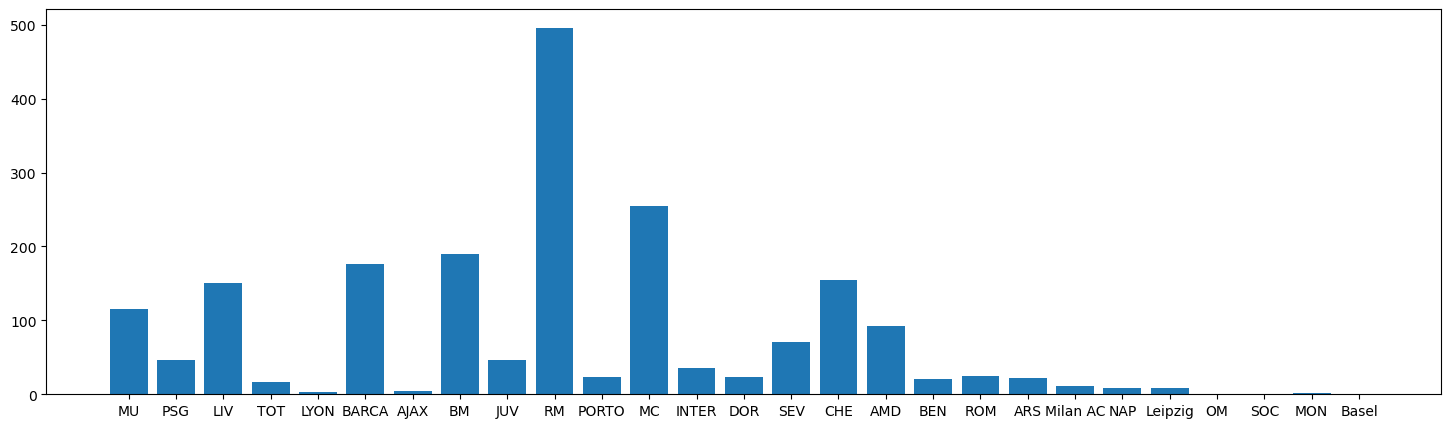

In [56]:
europaLeagueGraph()

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32']
[905, 937, 950, 947, 912, 909, 958, 1010, 950, 922, 960, 917, 916, 939, 929, 958, 950, 929, 940, 961, 909, 942, 940, 972, 910, 892, 982, 938, 940, 922, 902, 952]


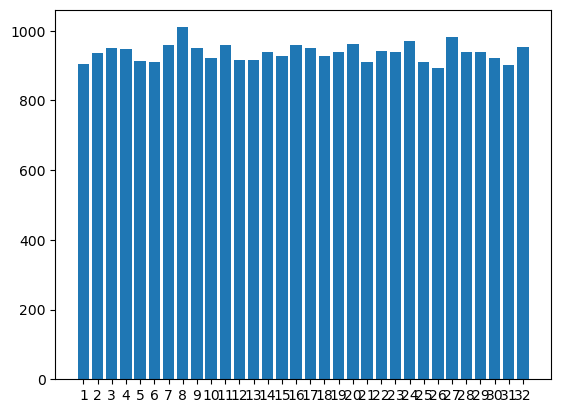

In [22]:
gagnant = {str(equipe):0 for equipe in range(1,33)}
for i in range(30000): 
    champion=randint(0,31)
    gagnant[list(gagnant.keys())[champion]]+=1
"""
    gagnantf={}
for cle in gagnant.keys():
    if gagnant[cle] != 0:
        gagnantf[cle] = gagnant[cle]
"""
names=list(gagnant.keys())
values=list(gagnant.values())
print(names)
print(values)
plt.bar(names,values)
plt.show()